In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random as alea
from scipy.linalg import solve,pinv,pinv2
from scipy.spatial.distance import pdist, squareform
import pandas as pd
from sklearn.decomposition import PCA
import time

In [6]:
# import nSimplices 
exec(compile(open(r"nSimplices_final.py", encoding="utf8").read(), "nSimplices_final.py", 'exec'))

# set matplotlib default savefig directory
plt.rcParams["savefig.directory"] = os.getcwd() # To save figures to directory
                                                #   defined above

Section 2.1.1: Cross dataset

In [3]:
### Prepare the dataset
df_cross = []
# for x in range(-6,7,1):
#     df_cross.append([x, 0, 0])
# for y in range(-6,7,1):
#     df_cross.append([0, y, 0])
df_cross = \
    [[-6, 0, 0], [-5, 0, 0], [-4, 0, 0], [-3, 0, 0], 
    [-2, 0, 0], [-1, 0, 0], [0, 0, 0], [1, 0, 0], 
    [2, 0, 0], [3, 0, 0], [4, 0, 0], [5, 0, 0], 
    [6, 0, 0], [0, -6, 0], [0, -5, 0], [0, -4, 0], 
    [0, -3, 0], [0, -2, 0], [0, -1, 0],  
    [0, 1, 0], [0, 2, 0], [0, 3, 0], 
    [0, 4, 0], [0, 5, 0], [0, 6, 0]]
df_cross = pd.DataFrame(df_cross)
num_point = df_cross.shape[0]

ori_dis=pdist(df_cross.copy()) # compute pairwise distance in data
ori_dis_sq=squareform(ori_dis) # true pairwise distance in squared form


In [4]:
# Add outliers to specific points 
# num_outliers = 3
# outlier_indices=np.sort(alea.sample(range(N),num_outliers))

# for idx in outlier_indices:
#     outlier=alea.uniform(-100,100)
#     df_cross.loc[idx,2] = outlier
df_cross = \
    [[-6, 0, -3], [-5, 0, 0], [-4, 0, 0], [-3, 0, 0], 
    [-2, 0, 0], [-1, 0, 0], [0, 0, 0], [1, 0, 0], 
    [2, 0, 0], [3, 0, 0], [4, 0, 0], [5, 0, 0], 
    [6, 0, 2], [0, -6, 0], [0, -5, 0], [0, -4, 4.5], 
    [0, -3, 0], [0, -2, 0], [0, -1, 0],  
    [0, 1, 0], [0, 2, 0], [0, 3, 0], 
    [0, 4, 0], [0, 5, 0], [0, 6, 0]]
df_cross = pd.DataFrame(df_cross)

In [5]:
### Preparing pairwise distances

""" euclidean distances """
out_dis = pdist(df_cross)
out_dis_sq = squareform(out_dis)

In [6]:

### Run nSimplices method
feature_num = df_cross.shape[1]
dim_start = 1
dim_end = df_cross.shape[1]
T1=time.time()
# outlier_indices, subspace_dim, corr_dis_sq, corr_coord = nSimplices(out_dis_sq, feature_num, dim_start, dim_end, euc_coord=np.array(df_cross.copy()))

outlier_indices, subspace_dim, corr_dis_sq, corr_coord = nSimplices(out_dis_sq, feature_num, dim_start, dim_end, euc_coord=None)

T2=time.time()
print("running time is:", T2-T1)
print("subspace dimension is:", subspace_dim)

med_height is: [2.81573998e+00 7.13851876e-08 2.51280591e-08]
subspace_dim one is: 2
subspace_heights for dimension 2 is: [3.00000000e+00 6.31695573e-08 7.86983637e-08 7.13851876e-08
 5.06419993e-08 6.20270043e-08 7.51203515e-09 3.09962548e-08
 5.60048308e-08 5.16191366e-08 8.47304636e-08 1.34313278e-07
 2.00000000e+00 1.62322092e-07 1.01897354e-07 4.50000000e+00
 8.94069672e-08 2.41197360e-08 3.06941749e-08 3.54195864e-08
 4.52935803e-08 7.18414484e-08 5.50301419e-08 8.54575430e-08
 8.55119942e-08]
subspace med is: 7.138518757128618e-08 std is: 2.07431882420838e-08 mean is: 0.38000005912370893
outlier indices are: [ 0 12 15]
idx is: 0 height is: 2.9999999999999996 thres is: 1.7510112878170518e-07
idx is: 12 height is: 1.9999999999999984 thres is: 1.7510112878170518e-07
idx is: 15 height is: 4.4999999999999964 thres is: 1.7510112878170518e-07
outlier proportion is: 0.12 int(subspace_dim * outlier_prop) is: 0
outliet_indices is: [ 0 12 15]
normal_mean is: [-0.13539309  0.00839106  0.053

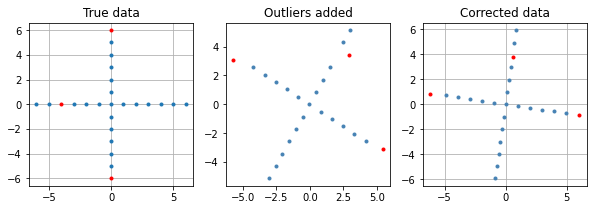

In [7]:
### Plot in 2D using the two largest eigenvalues - Fig.2

normal_indices=[i for i in range(num_point) if i not in outlier_indices] # list of normal points 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))

# plot original graph
va, ve, Xe = cMDS(ori_dis_sq)
ax1.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.')
ax1.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax1.set_title("True data")
ax1.grid()

# plot original graphs with outliers added 
va, ve, Xe = cMDS(out_dis_sq)
ax2.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='steelblue')
ax2.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax2.set_title("Outliers added")

# plot correct outliers 
va, ve, Xe = cMDS(corr_dis_sq)   
ax3.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='steelblue')
ax3.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax3.set_title("Corrected data")
ax3.grid()
plt.show()

Section 2.1.2: Main subspace of dimension 2

In [35]:
### test data, read in a dataset of main dimension 2
df_dim2 = pd.read_csv(r'outputs/bdd_synthetic_rdim2.csv',sep=';',header=None)
df_dim2.head()

,0,1,2,3,4,5,6
0,4.108126,9.195858,0.0,3.000025,9.999995,0.000156,1.999997
1,-1.603998,15.248422,0.0,3.000646,9.999914,0.000069,1.999624
2,2.581031,5.472205,0.0,3.000023,9.999979,-0.000014,1.999897
3,4.590847,1.487227,0.0,2.999953,9.999922,-0.000026,2.000195
4,0.139446,10.189354,0.0,2.999917,10.000031,-0.000004,2.000052


In [36]:
### Processing datasets and computing pairwise distances
num_point = df_dim2.shape[0]
ori_dis = pdist(df_dim2.copy()) # compute pairwise distance in data
ori_dis_sq = squareform(ori_dis) # true pairwise distance in squared form

In [37]:
### Add outliers
prop = 0.05
num_outliers = int(np.ceil(prop * num_point))

# random draw of outliers 
indices = np.sort(alea.sample(range(num_point),num_outliers))
for n in indices:
    outlier = alea.uniform(-10,10)
    # only add outliers to the third dimension for the visualization purpose
    print(outlier)
    df_dim2.loc[n,2] = outlier 
    
df_dim2.head(20)

-5.905057115490282
-6.249546790880496
3.4371051730116235
9.236198775429358
9.058741593898205
5.317105038859067
1.5405204074264702
-3.617894182927288
-1.0257913205189535
-8.871342829570711


,0,1,2,3,4,5,6
0,4.108126,9.195858,0.0,3.000025,9.999995,0.000156,1.999997
1,-1.603998,15.248422,0.0,3.000646,9.999914,0.000069,1.999624
2,2.581031,5.472205,0.0,3.000023,9.999979,-0.000014,1.999897
3,4.590847,1.487227,0.0,2.999953,9.999922,-0.000026,2.000195
4,0.139446,10.189354,0.0,2.999917,10.000031,-0.000004,2.000052
5,3.425654,2.532873,0.0,3.000065,10.000141,-0.000119,2.000184
6,0.588362,9.597309,0.0,3.000634,10.000055,-0.000050,1.999928
7,4.309042,9.118282,0.0,2.999782,10.000109,-0.000128,1.999829
8,1.335948,19.441798,0.0,2.999911,9.999955,0.000117,1.999644
9,0.349378,14.934555,0.0,2.999384,10.000025,-0.000055,2.000201


In [38]:
### Preparing pairwise distances

""" euclidean distances """
out_dis=pdist(df_dim2) # pairwise distance in tab (with outliers added)
out_dis_sq=squareform(out_dis) # squared matrix form of D

In [39]:
### Run nSimplices method
T1=time.time()
outlier_indices,rdim,corr_dis_sq,corr_coord = nSimplices(out_dis_sq, df_dim2.shape[1], dim_start = 1, dim_end = 7)
T2=time.time()
print("running time is:", T2-T1)
print("subspace dimension is:", rdim)

med_height is: [2.32555449e+00 9.41473906e-04 4.74465943e-04 2.91224603e-04
 1.56384439e-04 4.65306199e-07 2.04028227e-07]
subspace_dim one is: 2
subspace_heights for dimension 2 is: [1.02812502e-03 1.09718766e-03 6.93830187e-04 1.82386880e-03
 6.90829969e-04 8.82899373e-04 8.97772729e-04 1.10666366e-03
 1.92938262e-03 9.73329906e-04 1.31555406e-03 5.90582999e-04
 5.33636221e-04 1.15290711e-03 6.85320958e-04 9.41459586e-04
 6.77961156e-04 1.17214839e-03 9.70345320e-04 9.41488225e-04
 9.12235547e-04 2.31647709e-03 6.26397521e-04 5.90505718e+00
 6.24954682e+00 7.03020847e-04 8.23777911e-04 6.48993436e-04
 9.22995057e-04 1.12996705e-03 2.19320532e-03 1.32357255e-03
 8.23315850e-04 8.73048900e-04 1.67431028e-03 8.80624180e-04
 3.43710520e+00 7.02504506e-04 6.65569888e-04 1.81175114e-03
 1.00796987e-03 6.37774274e-04 7.02217760e-04 9.36138792e-04
 6.87162788e-04 1.05656119e-03 1.53515327e-03 1.45795173e-03
 6.86451430e-04 9.05979859e-04 1.08828032e-03 7.51504654e-04
 1.00951243e-03 1.060702

outlier: [ 3.87719944e+00  1.93661369e+01  0.00000000e+00  2.99998745e+00
  9.99985097e+00 -8.57316833e-05  1.99984917e+00]
outlier: [ 8.53083466e-01  1.02131347e+01 -3.37566177e+00  3.00055328e+00
  1.00000391e+01 -1.18595733e-04  2.00004348e+00]
outlier: [ 1.26690950e-01  8.98946803e+00 -2.28448756e+00  2.99972224e+00
  1.00000318e+01  1.04570406e-04  2.00058008e+00]
outlier: [2.19006042e+00 1.63500508e+01 1.12664024e+00 3.00049501e+00
 1.00000450e+01 7.67530732e-05 2.00003672e+00]
outlier: [-6.72935604e-01 -2.39560928e+00  0.00000000e+00  2.99987915e+00
  1.00001295e+01  2.13648648e-07  2.00000722e+00]
outlier: [ 2.97857778e+00  8.99466426e+00 -1.30157204e+00  2.99952080e+00
  9.99981045e+00  1.01288847e-05  2.00008285e+00]
outlier: [-1.19117308e+00  1.43749937e+01 -8.17329414e+00  3.00037404e+00
  1.00000940e+01  1.21021484e-04  2.00018668e+00]
outlier: [2.33908121e+00 1.67499498e+01 1.61970713e+00 3.00035736e+00
 9.99980551e+00 1.81396354e-04 2.00022745e+00]
outlier: [6.57600064e+

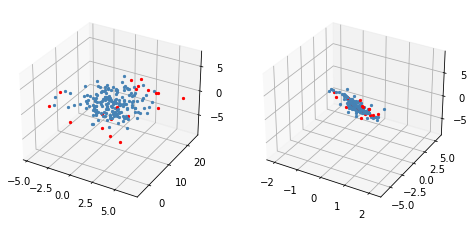

original coord is:           0          1    2         3          4         5         6
0  4.108126   9.195858  0.0  3.000025   9.999995  0.000156  1.999997
1 -1.603998  15.248422  0.0  3.000646   9.999914  0.000069  1.999624
2  2.581031   5.472205  0.0  3.000023   9.999979 -0.000014  1.999897
3  4.590847   1.487227  0.0  2.999953   9.999922 -0.000026  2.000195
4  0.139446  10.189354  0.0  2.999917  10.000031 -0.000004  2.000052
5  3.425654   2.532873  0.0  3.000065  10.000141 -0.000119  2.000184
6  0.588362   9.597309  0.0  3.000634  10.000055 -0.000050  1.999928
7  4.309042   9.118282  0.0  2.999782  10.000109 -0.000128  1.999829
8  1.335948  19.441798  0.0  2.999911   9.999955  0.000117  1.999644
9  0.349378  14.934555  0.0  2.999384  10.000025 -0.000055  2.000201
corr_coord is:           0         1         2         3         4         5         6
0  0.632620 -0.850376  0.237854 -2.462992  0.721219  0.540381 -1.334218
1 -0.364837 -0.987641  2.896123  4.646420 -1.105196 -1.723009  

In [13]:
### Section 2.1.2
### Plot in 3D using the first three dimensions - Fig.3(A) 
# (TODO: combine two subfigures into one row)

ori_coord=np.array(df_dim2)

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121, projection='3d')

# plot the original coordinates

for i in range(num_point):
    e=ori_coord[i]
    if (i in outlier_indices):
        print("outlier:", e)
        ax1.scatter(e[0],e[1],e[2], s=5, color='red')
    else:
        ax1.scatter(e[0],e[1],e[2], s=5, color='steelblue')
# plt.show()

ax2 = fig.add_subplot(122, projection='3d')

# plot the corrected coordinates

for i in range(num_point):
    e=corr_coord[i]
    if (i in outlier_indices):
        print("outlier corrected:", e)
        ax2.scatter(e[0],e[1],e[2], s=5, color='red')
    else:
        ax2.scatter(e[0],e[1],e[2], s=5, color='steelblue')
plt.show() # TODO: check with Khanh： this plot doesn't look correct, the original normal points are shifted too.


print("original coord is:", df_dim2.head(10))
print("corr_coord is:", pd.DataFrame(corr_coord).head(10))


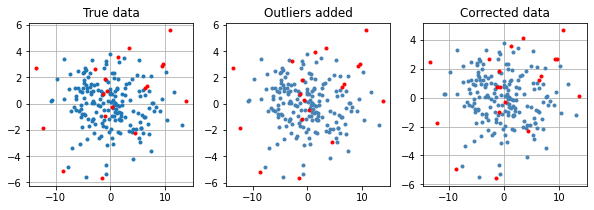

In [14]:
### Section 2.1.2
### Plot in 2D using the two largest eigenvalues - Fig.3(B) 

normal_indices=[i for i in range(num_point) if i not in outlier_indices] # list of normal points 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))

# plot original graph
va, ve, Xe = cMDS(ori_dis_sq)
ax1.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.')
ax1.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax1.set_title("True data")
ax1.grid()

# plot original graphs with outliers added 
va, ve, Xe = cMDS(out_dis_sq)
ax2.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='steelblue')
ax2.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax2.set_title("Outliers added")

# plot correct outliers 
va, ve, Xe = cMDS(corr_dis_sq)   
ax3.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='steelblue')
ax3.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax3.set_title("Corrected data")
ax3.grid()
plt.show()

Section 2.1.3: Main subspace of higher dimensions

In [10]:
### Prepare for section 2.1.3

### test data, read in a dataset of main dimension 10
df_dim10 = pd.read_csv(r'outputs/bdd_synthetic_rdim10.csv',sep=';',header=None)
df_dim10.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.346055,22.723392,-0.701786,2.227686,8.867002,7.294672,-1.244994,14.155604,-5.084177,-3.986579,0.000109,0.000222,2.000061
1,-5.346235,10.579452,5.536894,-1.932795,7.604257,8.566629,-7.885189,15.118067,11.555391,-5.305553,0.000040,0.000163,1.999936
2,0.417638,16.220836,5.348373,6.020883,9.508514,0.513170,-0.843460,2.312606,-7.226711,1.287742,-0.000005,0.000006,2.000057
3,3.220952,5.941649,-1.029061,1.633441,6.873947,9.677599,-2.930156,5.008181,5.359568,2.679466,0.000079,0.000053,1.999972
4,4.038657,17.066148,1.989288,-0.154957,2.783183,14.266470,3.972917,8.380464,4.615201,-1.695926,0.000006,-0.000143,1.999924


In [11]:
ori_dis = pdist(df_dim10.copy())
ori_dis_sq = squareform(ori_dis)
num_point =df_dim10.shape[0]

In [12]:
### Add outliers

prop=0.05
num_outliers=int(np.ceil(prop * num_point))
# random draw of outliers 
outlier_indices=np.sort(alea.sample(range(num_point),num_outliers))
print("outlier_indices are:", outlier_indices)
for n in outlier_indices:
    outlier=alea.uniform(-100,100)
    
    # for each row, add outliers to one of columns 10 to 15 (inclusive)
    # columns 10 to 15 are originally simulated with Guassian(2, 0.05)
    i=alea.randint(10,12) #TODO: the outliers need to be more carefully selected
    df_dim10.loc[n,i] = outlier
df_dim10.head(50)
#  [ 10  19  92 106 126 145 158]

outlier_indices are: [  1   2   3  52  70  75  85 171 177 197]


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.346055,22.723392,-0.701786,2.227686,8.867002,7.294672,-1.244994,14.155604,-5.084177,-3.986579,0.000109,2.215420e-04,2.000061
1,-5.346235,10.579452,5.536894,-1.932795,7.604257,8.566629,-7.885189,15.118067,11.555391,-5.305553,74.384169,1.632060e-04,1.999936
2,0.417638,16.220836,5.348373,6.020883,9.508514,0.513170,-0.843460,2.312606,-7.226711,1.287742,-0.000005,5.847022e-06,89.694109
3,3.220952,5.941649,-1.029061,1.633441,6.873947,9.677599,-2.930156,5.008181,5.359568,2.679466,58.847835,5.292389e-05,1.999972
4,4.038657,17.066148,1.989288,-0.154957,2.783183,14.266470,3.972917,8.380464,4.615201,-1.695926,0.000006,-1.433421e-04,1.999924
5,-0.216466,7.674194,3.011064,4.012194,6.684581,12.099280,0.177164,6.115568,3.883029,4.444822,-0.000026,-3.204105e-05,2.000003
6,-10.521468,13.699618,4.359485,-1.036071,-16.257171,7.300824,-0.188812,9.766753,-2.015481,-1.738705,0.000039,4.431242e-05,1.999905
7,-6.389067,13.923699,4.513219,4.021901,2.207410,0.809609,4.022694,0.997024,6.265639,-4.669496,-0.000037,-3.160089e-05,2.000137
8,-2.008601,8.795534,8.402512,-7.398434,12.670521,3.755911,-7.098727,9.433003,5.472166,0.787565,-0.000019,-9.168922e-05,1.999887
9,5.712563,10.133286,-8.082395,-10.770192,0.524984,10.430771,-2.137119,3.033805,6.597308,-10.781498,-0.000020,-3.426131e-05,1.999961


In [13]:
### Preparing pairwise distances for the dataset with outliers

""" euclidean distances """
out_dis=pdist(df_dim10)
out_dis_sq=squareform(out_dis)


In [14]:
### Run nSimplices method
T1=time.time()
outlier_indices,subspace_dim,corr_dis_sq,corr_coord = nSimplices(out_dis_sq, df_dim10.shape[1], dim_start=1, dim_end=df_dim10.shape[1])
T2=time.time()
print("running time is:", T2-T1)
print("subspace dimension is:", subspace_dim)
# TODO: look into outlier proportion correction in subspace dimension

med_height is: [1.81198450e+01 1.61299006e+01 1.45244163e+01 1.33689090e+01
 1.18345445e+01 1.05489439e+01 8.99623791e+00 6.98458492e+00
 4.83540588e+00 4.05763268e-03 4.73658066e-04 1.95240956e-04
 1.08280405e-06]
subspace_dim one is: 10
subspace_heights for dimension 10 is: [1.94123002e-03 7.43841583e+01 8.76940293e+01 5.88477848e+01
 2.12244699e-03 2.07658387e-03 5.24721775e-03 2.51249146e-03
 2.67684305e-03 7.39545838e-01 9.13618259e-04 1.05564367e-03
 7.05825831e-03 1.39336315e-03 8.22665126e-03 1.49457864e-03
 1.27515903e-03 1.17422049e+00 5.75672119e-03 3.38918617e-03
 3.39672419e-02 1.39311904e-03 1.51258564e-03 1.90095061e-03
 1.07083228e-01 1.00040203e-02 2.46062972e-03 1.93887888e-03
 3.45259938e-03 4.76434051e-03 1.90750074e-02 2.58541380e-03
 1.83525570e-02 8.35620693e-03 2.48171740e-03 1.73219513e-03
 1.13199114e-02 2.33923048e-03 4.09485979e-01 3.43182884e-03
 1.67183927e-03 4.22123369e-03 3.51278455e-03 1.48187678e-03
 1.51778411e-03 1.85161739e-03 5.34312185e-01 2.9824

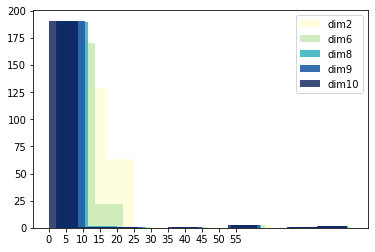

In [15]:
### Importance of dimension correction in higher dimension - Fig.4(A) height distribution 

hcolls = []
start_dim = 2
end_dim = 15
for dim in range(start_dim, end_dim+1):
    heights = nSimplwhichh(num_point, out_dis_sq, dim, seed=dim+1)
    hcolls.append(heights)

blues=np.array([[255,255,217,256*0.8],[199,233,180,256*0.8], [65,182,196,256*0.9], [34,94,168,256*0.9], [8,29,88,256*0.8]])/256

plt.figure()
# select a few dimensions (i.e. 2,6,8,9,10) for demonstrating the distributions of heights
plt.hist(hcolls[2-start_dim],label='dim2',color=blues[0])
plt.hist(hcolls[6-start_dim],label='dim6',color=blues[1])
plt.hist(hcolls[8-start_dim],label='dim8',color=blues[2])
plt.hist(hcolls[9-start_dim],label='dim9',color=blues[3])
plt.hist(hcolls[10-start_dim],label='dim10',color=blues[4])

plt.xticks(np.arange(0, 60, 5))
plt.legend()
plt.show()


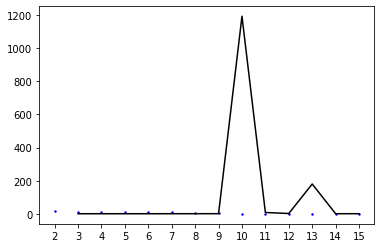

In [16]:
### Importance of dimension correction in higher dimension - Fig.4(B) dimensionality inference
# (TODO: check with Khanh, this plot does not do dimension correction)
# (TODO: not exactly the same as in the manuscript)

# calculate median heights for tested dimension from start_dim to end_dim
h_meds = []
for hcoll in hcolls:
    h_meds.append(np.median(hcoll))

# calculate the ratio, where h_med_ratios[i] corresponds to h_meds[i-1]/h_meds[i]
# which is the (median height of dim (i-1+start_dim))/(median height of dim (i+start_dim))
h_med_ratios = []
for i in range(1, len(hcolls)):
    # print("dim", start_dim+i-1, "ratio is:", h_meds[i-1]/h_meds[i], h_meds[i-1], h_meds[i])
    h_med_ratios.append(h_meds[i-1]/h_meds[i])

# plot the height scatterplot and the ratios

plt.figure()
plt.scatter(list(range(start_dim, end_dim+1)), h_meds, c ="blue", s=2)
plt.plot(list(range(start_dim+1, end_dim+1)), h_med_ratios, c="black")
plt.xticks(np.arange(start_dim, end_dim+1, 1))
plt.show()


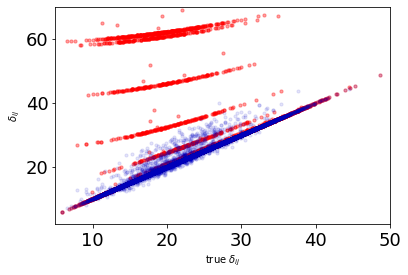

In [17]:
### Importance of dimension correction in higher dimension - Fig.4(C) Shepard Diagram
# (TODO: not exactly the same as in the manuscript)

out_dis_flat=out_dis_sq.flatten() # [200*200]
ori_dis_flat=ori_dis_sq.flatten()
corr_dis_flat=corr_dis_sq.flatten()

plt.figure()
SMALL_SIZE=18
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.scatter(ori_dis_flat,out_dis_flat,color='red',alpha=0.2,s=10)
plt.scatter(ori_dis_flat,corr_dis_flat,color='mediumblue',alpha=0.05,s=10)

plt.xlabel(r"true $\delta_{ij}$")
plt.ylabel(r'$\delta_{ij}$')
axes = plt.gca()
axes.set_xlim(5,50)
axes.set_ylim(2,70)

plt.show()


Section 2.1.4: Dimension correction in higher dimensions

In [7]:
# Read in dataset of main dimension 40
df_dim40 = pd.read_csv(r'outputs/bdd_synthetic_rdim40.csv',sep=';',header=None)
df_dim40.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,3.271179,-0.288140,1.003954,-5.672843,-8.174563,9.381343,0.652946,7.204627,5.287367,1.403878,...,7.134084,14.527434,-0.543498,-0.872188,-0.000068,-0.000077,4.999888,-0.000021,9.378589e-05,1.999910
1,8.408560,13.288566,-1.595746,1.045023,9.024490,4.167615,2.073387,5.614335,7.053868,-8.313852,...,1.433317,8.700117,-0.368710,1.639121,-0.000043,0.000047,5.000050,-0.000073,-3.361122e-05,2.000048
2,0.589400,12.175038,1.179524,3.165649,9.050043,14.157003,0.025747,14.501764,-3.270914,-2.021222,...,6.089331,5.790368,5.424499,7.801971,0.000104,0.000198,5.000080,-0.000108,4.431686e-07,1.999999
3,-5.286257,8.455824,7.074286,-4.139334,1.160208,5.619972,-1.438155,10.767016,-2.156296,-1.757692,...,-7.783939,3.240802,-0.436022,4.212766,-0.000066,0.000091,5.000149,0.000020,-1.204999e-05,2.000105
4,4.081563,8.452946,10.953974,3.921005,2.301202,2.826354,-3.099561,13.775860,12.594311,1.236560,...,1.655609,11.491205,6.224757,2.814955,-0.000121,0.000104,4.999999,0.000071,1.831110e-04,1.999894


In [8]:
prop = 0.04
df_outlier = sim_outliers(df_dim40, prop, 40, 45)
out_dis=pdist(df_outlier) # pairwise distance in tab (with outliers added)
out_dis_sq=squareform(out_dis) # squared matrix form of D
subspace_dim, _ = find_subspace_dim(out_dis_sq, 30, df_outlier.shape[1])

print("subspace_dim is:", subspace_dim)

med_height is: [1.68230047e+01 1.57290110e+01 1.49274488e+01 1.39770327e+01
 1.30791234e+01 1.21243726e+01 1.10457878e+01 9.64187631e+00
 8.48459639e+00 6.98276247e+00 4.36709326e+00 8.85119644e-02
 1.48860790e-03 8.23213486e-04 4.89514703e-04 2.44033423e-04
 5.04553188e-06]
subspace_dim one is: 42
subspace_heights for dimension 42 is: [1.38355298e-03 1.37531320e-03 1.40595359e-03 1.22264618e-03
 1.50676851e-03 1.82547233e-03 1.65672808e-03 1.68017313e-03
 1.53437382e-03 1.36647948e-03 1.47139040e-03 1.54135568e-03
 1.83105155e-03 1.48585715e-03 1.55857653e-03 1.13187515e-03
 1.77538152e-03 1.51712668e-03 1.63754221e-03 1.27162106e-03
 1.86306647e-03 1.30646520e-03 1.16298086e-03 1.83908506e-03
 1.12626852e-03 1.77925600e-03 1.38888386e-03 1.04992934e-03
 1.40737429e-03 1.63333836e-03 2.52555641e-03 1.48725641e-03
 2.19855959e-03 1.28725992e-03 1.75272225e-03 1.05710390e-03
 1.67894218e-03 1.46453795e-03 1.60848934e-03 1.81955931e-03
 1.43497040e-03 1.57663358e-03 1.51743105e-03 1.4952

In [9]:
props = np.arange(0, 0.14, 0.02)
dim_pred_diff = []
dim_raw_diff= []
true_dim = 40
num_components = 50
for prop in props:
    df_outlier = sim_outliers(df_dim40, prop, 40, 45)
    out_dis=pdist(df_outlier) # pairwise distance in tab (with outliers added)
    out_dis_sq=squareform(out_dis) # squared matrix form of D
    subspace_dim, _ = find_subspace_dim(out_dis_sq, 30, df_outlier.shape[1])
    dim_pred_diff.append(subspace_dim - true_dim)
    dim_raw_diff.append(subspace_dim + int((subspace_dim * prop) - true_dim))
    print("subspace_dim is:", subspace_dim)

med_height is: [1.56324674e+01 1.45999179e+01 1.37853404e+01 1.26884656e+01
 1.16816108e+01 1.05816919e+01 9.24135524e+00 7.69930128e+00
 5.98135022e+00 3.36196237e+00 2.20915627e-03 1.15161617e-03
 7.91325569e-04 5.75540286e-04 3.86768685e-04 2.02363879e-04
 4.84167846e-06]
subspace_dim one is: 40
subspace_heights for dimension 40 is: [0.00172581 0.00197363 0.0020408  0.00189568 0.00194    0.00207504
 0.00288976 0.00272105 0.00239214 0.0020718  0.00189847 0.00161565
 0.00206986 0.00265624 0.00270106 0.00204233 0.00222948 0.00210428
 0.00220958 0.00217094 0.00259684 0.00210644 0.00183356 0.00287802
 0.00211663 0.00244201 0.00244446 0.00221044 0.00200977 0.0022387
 0.0026806  0.00184136 0.00241305 0.0022205  0.00164755 0.00179394
 0.00233745 0.00194743 0.00224039 0.00202712 0.00262219 0.00231593
 0.00199307 0.00247231 0.00220054 0.00307105 0.0026368  0.00261501
 0.00337816 0.00194034 0.00187575 0.0024891  0.00317259 0.002007
 0.00196066 0.00228344 0.00249421 0.00217144 0.0020268  0.0016

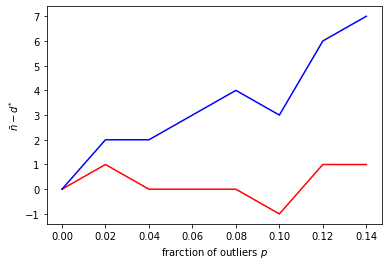

In [16]:
plt.figure()
plt.plot(props, dim_pred_diff, c="red", label = "after correction")
plt.plot(props, dim_raw_diff, c="blue", label = "before correction")
plt.xticks(props)
plt.xlabel(r'frarction of outliers $p$')
plt.ylabel(r'$\bar{n}-d^{*}$')
plt.show()